In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_excel("feature_engineering.xlsx")
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Single_Parent,Recency_Class,Age_Class,Total_Spent,Total_Spent_Class,Total_Purchases,Total_Purchases_Class,Total_Visits,Total_Visits_Class,Average_Purchase
0,1826,Graduation,Divorced,84835,0,0,0,189,104,379,...,False,Very Recent,Retiree,1190,Average-Spender,15,15-19,1,0-19,602.5
1,1,Graduation,Single,57091,0,0,0,464,5,64,...,False,Very Recent,Senior Citizen,577,Light-Spender,18,15-19,5,0-19,297.5
2,10476,Graduation,Married,67267,0,1,0,134,11,59,...,False,Very Recent,Senior Citizen,251,Cheap-Spender,11,10-14,2,0-19,131.0
3,1386,Graduation,Together,32474,1,1,0,10,0,1,...,False,Very Recent,Retiree,11,Cheap-Spender,4,0-4,7,0-19,7.5
4,5371,Graduation,Single,21474,1,0,0,6,16,24,...,True,Very Recent,Middle-Aged Working Class,91,Cheap-Spender,8,5-9,7,0-19,49.5


## Feature Engineering

In [2]:
features = df.drop(columns=['ID'])
features = pd.get_dummies(features, columns=['Education'], 
                          prefix='Education')
features = pd.get_dummies(features, columns=['Marital_Status'], 
                          prefix='Marital')
features = pd.get_dummies(features, columns=['Recency_Class'], 
                          prefix='Recency')
features = pd.get_dummies(features, columns=['Age_Class'], 
                          prefix='Age')
features = pd.get_dummies(features, 
                          columns=['Total_Spent_Class'],
                           prefix='Total_Spent')
features = pd.get_dummies(features, 
                          columns=['Total_Purchases_Class'], 
                          prefix='Total_Purchases')
features = pd.get_dummies(features, 
                          columns=['Total_Visits_Class'], 
                          prefix='Total_Visits')
features = pd.get_dummies(features, 
                          columns=['Family_Classification'], 
                          prefix='Family_Classification')

In [ ]:
print(list(features.columns)) # list down all columns to
# be included


In [3]:
features.reset_index(inplace=True) # fix bug for encoding of
# income

## Logistic Regression

In [6]:
from sklearn.model_selection import train_test_split
X = features.drop(columns=['Response'], axis=1).iloc[:,1:][
    ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 
    'NumWebVisitsMonth', 
    'Complain', 'Age', 'Customer_Enrollment', 'Household', 
    'Children', 'Single_Parent', 'Total_Spent', 
    'Total_Purchases', 'Total_Visits', 'Average_Purchase', 
    'Education_2n Cycle', 'Education_Basic', 
    'Education_Graduation', 'Education_Master', 'Education_PhD', 
    'Marital_Divorced', 'Marital_Married', 'Marital_Single', 
    'Marital_Together', 'Marital_Widow', 'Recency_Infrequent', 
    'Recency_Less Frequent', 'Recency_Moderate', 
    'Recency_Recent', 'Recency_Very Recent', 
    'Age_Middle-Aged Working Class', 'Age_Quinquagenarian', 
    'Age_Retiree',  'Age_Senior Citizen', 
    'Age_Very Old Senior Citizen', 
    'Total_Spent_Above-Average-Spender', 
    'Total_Spent_Average-Spender', 
    'Total_Spent_Cheap-Spender', 
    'Total_Spent_Heavy-Spender', 
    'Total_Spent_Light-Spender', 
    'Total_Spent_Very-Heavy-Spender', 
    'Total_Purchases_0-4', 'Total_Purchases_10-14', 
    'Total_Purchases_15-19', 
    'Total_Purchases_20-24', 'Total_Purchases_25-29', 
    'Total_Purchases_30-34', 
    'Total_Purchases_35-39+', 'Total_Purchases_5-9', 
    'Total_Visits_0-19', 
    'Total_Visits_100-119+', 'Total_Visits_20-39', 
    'Total_Visits_40-59', 
    'Total_Visits_60-79', 'Total_Visits_80-99', 
    'Family_Classification_Childless', 
    'Family_Classification_Medium-Children', 
    'Family_Classification_Single-Child']
]
y = features['Response']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42)
X_train

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_Purchases_5-9,Total_Visits_0-19,Total_Visits_100-119+,Total_Visits_20-39,Total_Visits_40-59,Total_Visits_60-79,Total_Visits_80-99,Family_Classification_Childless,Family_Classification_Medium-Children,Family_Classification_Single-Child
1265,65316,1,1,65,112,6,92,3,9,38,...,False,False,False,False,False,True,False,False,True,False
277,72940,0,0,13,182,74,298,162,149,116,...,False,True,False,False,False,False,False,True,False,False
1776,74716,0,1,92,133,27,421,13,195,71,...,False,False,False,False,False,False,True,False,False,True
358,81361,0,0,18,163,23,424,27,65,76,...,False,True,False,False,False,False,False,True,False,False
1816,85072,0,0,94,494,92,391,194,11,241,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,83664,1,1,57,866,21,151,28,21,86,...,False,False,False,False,False,True,False,False,True,False
1294,82072,0,0,67,889,55,685,168,92,129,...,False,False,False,False,False,True,False,True,False,False
860,80950,0,0,44,525,147,112,219,147,63,...,False,False,False,False,True,False,False,True,False,False
1459,37859,1,2,75,22,1,8,2,1,2,...,True,False,False,False,False,False,True,False,True,False


In [7]:
X_test

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Total_Purchases_5-9,Total_Visits_0-19,Total_Visits_100-119+,Total_Visits_20-39,Total_Visits_40-59,Total_Visits_60-79,Total_Visits_80-99,Family_Classification_Childless,Family_Classification_Medium-Children,Family_Classification_Single-Child
1259,44300,1,1,65,30,0,9,0,0,3,...,True,False,False,False,False,True,False,False,True,False
1623,62807,0,1,83,526,28,135,10,21,99,...,False,False,False,False,False,False,True,False,False,True
611,70287,0,0,30,295,35,482,121,120,40,...,False,False,False,True,False,False,False,True,False,False
514,75283,1,2,26,733,9,180,12,19,66,...,False,False,False,True,False,False,False,False,True,False
413,61839,0,0,20,1000,155,379,224,17,120,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,65106,0,1,55,790,19,133,12,0,19,...,False,False,False,False,False,True,False,False,False,True
1255,55412,1,1,65,10,5,28,11,1,8,...,True,False,False,False,False,True,False,False,True,False
1831,71626,0,0,94,546,72,376,94,145,72,...,False,False,False,False,False,False,True,True,False,False
1173,96843,0,0,60,448,71,951,40,17,17,...,False,False,False,False,False,True,False,True,False,False


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Hyperparameter Optimization

In [9]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('lg', LogisticRegression(random_state=42))
])
parameters = {
    'smote__sampling_strategy': ['not majority', 
    'all', 'auto', 'minority', 'not minority'], 
    'smote__k_neighbors': [3, 5, 7, 9], 
    'lg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
    'lg__solver': ['liblinear', 'lbfgs'] 
}
grid_search = GridSearchCV(pipeline,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Best parameters: {'lg__C': 0.01, 'lg__solver': 'lbfgs', 'smote__k_neighbors': 3, 'smote__sampling_strategy': 'not minority'}


In [10]:
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

smote = SMOTE(sampling_strategy=
              best_params['smote__sampling_strategy'], 
              k_neighbors=best_params['smote__k_neighbors'], 
              random_state=42)

lg = LogisticRegression(C=best_params['lg__C'], 
                        solver=best_params['lg__solver'], 
                        random_state=42)

pipeline = Pipeline([('smote', smote), ('lg', lg)])

pipeline.fit(X_train_scaled, y_train)

lg_pred_train = pipeline.predict(X_train_scaled)
lg_pred_test = pipeline.predict(X_test_scaled)

lg_acc = accuracy_score(y_test, lg_pred_test)
lg_prec = precision_score(y_test, lg_pred_test)
lg_rec = recall_score(y_test, lg_pred_test)
lg_f1 = f1_score(y_test, lg_pred_test)
lg_auc = roc_auc_score(y_test, lg_pred_test)

print("Logistic Regression Accuracy: %.4f" % lg_acc)
print("Logistic Regression Precision: %.4f" % lg_prec)
print("Logistic Regression Recall: %.4f" % lg_rec)
print("Logistic Regression F1: %.4f" % lg_f1)
print("Logistic Regression AUC: %.4f" % lg_auc)

lg_prec_train = precision_score(y_train, lg_pred_train)
lg_prec_test = precision_score(y_test, lg_pred_test)

print('Training set precision: {:.4f}'.format(lg_prec_train))
print('Test set precision: {:.4f}'.format(lg_prec_test))


Logistic Regression Accuracy: 0.8804
Logistic Regression Precision: 0.7200
Logistic Regression Recall: 0.2250
Logistic Regression F1: 0.3429
Logistic Regression AUC: 0.6055
Training set precision: 0.7213
Test set precision: 0.7200


Confusion matrix

 [[490   7]
 [ 62  18]]

True Positives(TP) =  490

True Negatives(TN) =  18

False Positives(FP) =  7

False Negatives(FN) =  62


<Axes: >

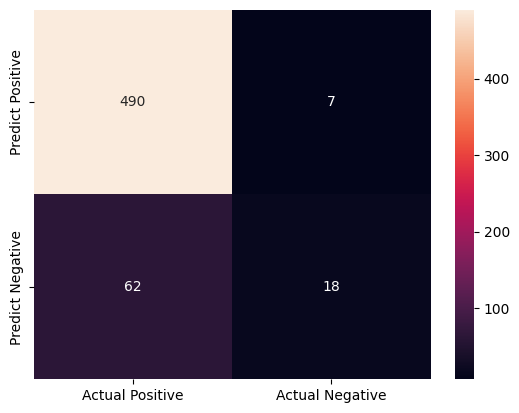

In [11]:
from sklearn.metrics import confusion_matrix
lg_cm = confusion_matrix(y_test, lg_pred_test)
print('Confusion matrix\n\n', lg_cm)
print('\nTrue Positives(TP) = ', lg_cm[0,0])
print('\nTrue Negatives(TN) = ', lg_cm[1,1])
print('\nFalse Positives(FP) = ', lg_cm[0,1])
print('\nFalse Negatives(FN) = ', lg_cm[1,0])
cm_matrix = pd.DataFrame(data=lg_cm, columns=['Actual Positive', 'Actual Negative'], 
        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

In [ ]:
nb_pred_train = nb.predict(X_train)
nb_pred_test = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred_test)
nb_prec = precision_score(y_test, nb_pred_test)
nb_rec = recall_score(y_test, nb_pred_test)
nb_f1 = f1_score(y_test, nb_pred_test)
nb_auc = roc_auc_score(y_test, nb_pred_test)
print("Naive Bayes Accuracy: %.4f" % nb_acc)
print("Naive Bayes Precision: %.4f" % nb_prec)
print("Naive Bayes Recall: %.4f" % nb_rec)
print("Naive Bayes F1: %.4f" % nb_f1)
print("Naive Bayes AUC: %.4f" % nb_auc)

nb_prec_train = precision_score(y_train, nb_pred_train)
nb_prec_test = precision_score(y_test, nb_pred_test)
# Check for overfitting
print('Training set score: {:.4f}'.format(nb_prec_train))
print('Test set score: {:.4f}'.format(nb_prec_test))

In [ ]:
nb_cm = confusion_matrix(y_test, nb_pred_test)
print('Confusion matrix\n\n', nb_cm)
print('\nTrue Positives(TP) = ', nb_cm[0,0])
print('\nTrue Negatives(TN) = ', nb_cm[1,1])
print('\nFalse Positives(FP) = ', nb_cm[0,1])
print('\nFalse Negatives(FN) = ', nb_cm[1,0])
cm_matrix = pd.DataFrame(data=nb_cm, columns=['Actual Positive', 'Actual Negative'], 
    index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Decision Trees

## HyperParameter Optimization

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('dt', DecisionTreeClassifier(random_state=42))
])
parameters = {
    'smote__sampling_strategy': ['not majority', 'all', 
    'auto', 'minority', 'not minority'],  
    'smote__k_neighbors': [3, 5, 7, 9],  
    'dt__max_depth': [None, 10, 20],  
    'dt__min_samples_split': [2, 5],  
    'dt__min_samples_leaf': [1, 2]  
}

grid_search = GridSearchCV(pipeline,  
                           param_grid=parameters,
                           scoring='precision',
                           cv=5,
                           verbose=1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)


In [ ]:
smote = SMOTE(sampling_strategy=
              best_params['smote__sampling_strategy'], 
              k_neighbors=best_params['smote__k_neighbors'], 
              random_state=42)

dt = DecisionTreeClassifier(
    max_depth=best_params['dt__max_depth'], 
    min_samples_split=best_params['dt__min_samples_split'], 
    min_samples_leaf=best_params['dt__min_samples_leaf'],
    random_state = 42)  

pipeline = Pipeline([('smote', smote), ('dt', dt)])

pipeline.fit(X_train_scaled, y_train)

dt_pred_train = pipeline.predict(X_train_scaled)
dt_pred_test = pipeline.predict(X_test_scaled)

dt_acc = accuracy_score(y_test, dt_pred_test)
dt_prec = precision_score(y_test, dt_pred_test)
dt_rec = recall_score(y_test, dt_pred_test)
dt_f1 = f1_score(y_test, dt_pred_test)
dt_auc = roc_auc_score(y_test, dt_pred_test)

print("Decision Tree Accuracy: %.4f" % dt_acc)
print("Decision Tree Precision: %.4f" % dt_prec)
print("Decision Tree Recall: %.4f" % dt_rec)
print("Decision Tree F1: %.4f" % dt_f1)
print("Decision Tree AUC: %.4f" % dt_auc)

dt_prec_train = precision_score(y_train, dt_pred_train)
dt_prec_test = precision_score(y_test, dt_pred_test)

print('Training set precision: {:.4f}'.format(dt_prec_train))
print('Test set precision: {:.4f}'.format(dt_prec_test))

In [ ]:
dt_cm = confusion_matrix(y_test, dt_pred_test)
print('Confusion matrix\n\n', dt_cm)
print('\nTrue Positives(TP) = ', dt_cm[0,0])
print('\nTrue Negatives(TN) = ', dt_cm[1,1])
print('\nFalse Positives(FP) = ', dt_cm[0,1])
print('\nFalse Negatives(FN) = ', dt_cm[1,0])
cm_matrix = pd.DataFrame(data=dt_cm, columns=['Actual Positive', 'Actual Negative'], 
         index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## K-Nearest Neighbors

## HyperParameter Optimization

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('knn', KNeighborsClassifier())
])
parameters = {
    'smote__sampling_strategy': ['not majority', 'all', 
    'auto', 'minority', 'not minority'], 
    'smote__k_neighbors': [3, 5, 7, 9],
    'knn__n_neighbors': [3, 5, 7, 9], 
    'knn__weights': ['uniform', 'distance'],  
    'knn__p': [1, 2]
}

grid_search = GridSearchCV(pipeline,  
                           param_grid=parameters,
                           scoring='precision',
                           cv=5,
                           verbose=1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

In [ ]:
smote = SMOTE(sampling_strategy=
              best_params['smote__sampling_strategy'], 
              k_neighbors=best_params['smote__k_neighbors'], 
              random_state=42)

knn = KNeighborsClassifier(n_neighbors=
                           best_params['knn__n_neighbors'], 
                           weights=best_params['knn__weights'],
                           p=best_params['knn__p'])

pipeline = Pipeline([('smote', smote), ('knn', knn)])

pipeline.fit(X_train_scaled, y_train)

knn_pred_train = pipeline.predict(X_train_scaled)
knn_pred_test = pipeline.predict(X_test_scaled)

knn_acc = accuracy_score(y_test, knn_pred_test)
knn_prec = precision_score(y_test, knn_pred_test)
knn_rec = recall_score(y_test, knn_pred_test)
knn_f1 = f1_score(y_test, knn_pred_test)
knn_auc = roc_auc_score(y_test, knn_pred_test)

print("k-Nearest Neighbors Accuracy: %.4f" % knn_acc)
print("k-Nearest Neighbors Precision: %.4f" % knn_prec)
print("k-Nearest Neighbors Recall: %.4f" % knn_rec)
print("k-Nearest Neighbors F1: %.4f" % knn_f1)
print("k-Nearest Neighbors AUC: %.4f" % knn_auc)

knn_prec_train = precision_score(y_train, knn_pred_train)
knn_prec_test = precision_score(y_test, knn_pred_test)

print('Training set precision: {:.4f}'.format(knn_prec_train))
print('Test set precision: {:.4f}'.format(knn_prec_test))

In [ ]:
knn_cm = confusion_matrix(y_test, knn_pred_test)
print('Confusion matrix\n\n', knn_cm)
print('\nTrue Positives(TP) = ', knn_cm[0,0])
print('\nTrue Negatives(TN) = ', knn_cm[1,1])
print('\nFalse Positives(FP) = ', knn_cm[0,1])
print('\nFalse Negatives(FN) = ', knn_cm[1,0])
cm_matrix = pd.DataFrame(data=knn_cm, columns=['Actual Positive', 'Actual Negative'], 
        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Support Vector Machines

## Hyperparameter Optimization

In [ ]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('svm', SVC(random_state=42))
])

parameters = {
    'smote__sampling_strategy': ['not majority', 
    'all', 'auto', 'minority', 'not minority'],  
    'smote__k_neighbors': [3, 5, 7, 9],  
    'svm__C': [0.1, 1],  
    'svm__kernel': ['linear', 'rbf'], 
    'svm__gamma': ['scale']  
}

grid_search = GridSearchCV(pipeline,  
                           param_grid=parameters,
                           scoring='precision',
                           cv=5,
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)


In [ ]:
smote = SMOTE(sampling_strategy=
              best_params['smote__sampling_strategy'], 
              k_neighbors=best_params['smote__k_neighbors'], 
              random_state=42)

svm = SVC(C=best_params['svm__C'], 
          kernel= best_params['svm__kernel'],
          gamma=best_params['svm__gamma'], random_state = 42)

pipeline = Pipeline([('smote', smote), ('svm', svm)])

pipeline.fit(X_train_scaled, y_train)

svm_pred_train = pipeline.predict(X_train_scaled)
svm_pred_test = pipeline.predict(X_test_scaled)

svm_acc = accuracy_score(y_test, svm_pred_test)
svm_prec = precision_score(y_test, svm_pred_test)
svm_rec = recall_score(y_test, svm_pred_test)
svm_f1 = f1_score(y_test, svm_pred_test)
svm_auc = roc_auc_score(y_test, svm_pred_test)

print("Support Vector Machines Accuracy: %.4f" % svm_acc)
print("Support Vector Machines Precision: %.4f" % svm_prec)
print("Support Vector Machines Recall: %.4f" % svm_rec)
print("Support Vector Machines F1: %.4f" % svm_f1)
print("Support Vector Machines AUC: %.4f" % svm_auc)

svm_prec_train = precision_score(y_train, svm_pred_train)
svm_prec_test = precision_score(y_test, svm_pred_test)

print('Training set precision: {:.4f}'.format(svm_prec_train))
print('Test set precision: {:.4f}'.format(svm_prec_test))

In [ ]:
svm_cm = confusion_matrix(y_test, svm_pred_test)
print('Confusion matrix\n\n', svm_cm)
print('\nTrue Positives(TP) = ', svm_cm[0,0])
print('\nTrue Negatives(TN) = ', svm_cm[1,1])
print('\nFalse Positives(FP) = ', svm_cm[0,1])
print('\nFalse Negatives(FN) = ', svm_cm[1,0])
cm_matrix = pd.DataFrame(data=svm_cm, columns=['Actual Positive', 'Actual Negative'], 
        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d')

## Summary of Results

In [ ]:
from prettytable import PrettyTable
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 
          'Precision Training Score', 'Precision Test Score']

logistic_reg = [lg_acc, lg_prec, lg_rec, lg_f1, lg_auc, 
                lg_prec_train, lg_prec_test]
logistic_reg = [f'{value:.4f}' if isinstance(value, float) 
                else value for value in logistic_reg]

naive_bayes = [nb_acc, nb_prec, nb_rec, nb_f1, nb_auc, 
               nb_prec_train, nb_prec_test]
naive_bayes = [f'{value:.4f}' if isinstance(value, float) 
               else value for value in naive_bayes]

decision_tree = [dt_acc, dt_prec, dt_rec, dt_f1, dt_auc, 
                 dt_prec_train, dt_prec_test]
decision_tree = [f'{value:.4f}' if isinstance(value, float) 
                 else value for value in decision_tree]

k_nearest = [knn_acc, knn_prec, knn_rec, knn_f1, knn_auc, 
             knn_prec_train, knn_prec_test] 
k_nearest = [f'{value:.4f}' if isinstance(value, float) 
             else value for value in k_nearest]

support_vector = [svm_acc, svm_prec, svm_rec, svm_f1, svm_auc, 
                  svm_prec_train, svm_prec_test]
support_vector = [f'{value:.4f}' if isinstance(value, float) 
                  else value for value in support_vector]

variables = [
    ('Logistic Regression', logistic_reg),
    ('Naive Bayes', naive_bayes),
    ('Decision Tree', decision_tree),
    ('k-Nearest Neighbors', k_nearest),
    ('Support Vector Machines', support_vector)
]
table = PrettyTable()
table.add_column('Algorithm', labels)
table.add_column('Logistic Regression', logistic_reg)
table.add_column('Naive Bayes', naive_bayes)
table.add_column('Decision Tree', decision_tree)
table.add_column('k-Nearest Neighbors', k_nearest)
table.add_column('Support Vector Machines', support_vector)
table.align = 'l'
print(table)